In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df_raw = pd.read_csv("creditcard.csv")
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_raw.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
#Check for missing values 
df= df_raw.copy()
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.duplicated().sum()

np.int64(1081)

In [7]:
df_cleaned = df.drop_duplicates().copy()
df_cleaned["Amount_log"] = np.log(df_cleaned["Amount"].replace(0, 0.01))

C:\Users\RIDHAM INANI\AppData\Local\Temp\ipykernel_15596\273142244.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x="Class", palette="Set2")


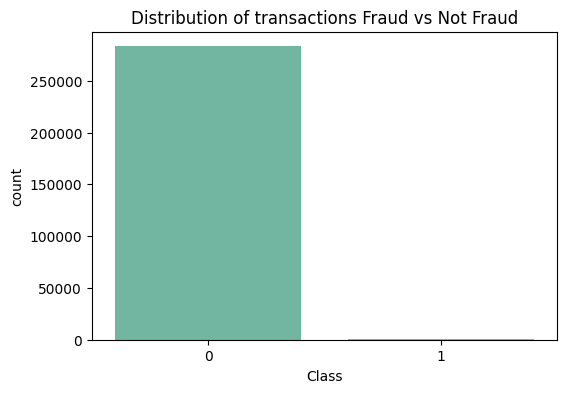

Percentage of fraud: 0.1727%


In [8]:
#Distribution for variable class
plt.figure(figsize=(6,4))
sns.countplot(data=df_cleaned, x="Class", palette="Set2")
plt.title("Distribution of transactions Fraud vs Not Fraud")
plt.show()

fraud_pct = df["Class"].mean() *100
print(f"Percentage of fraud: {fraud_pct:.4f}%")

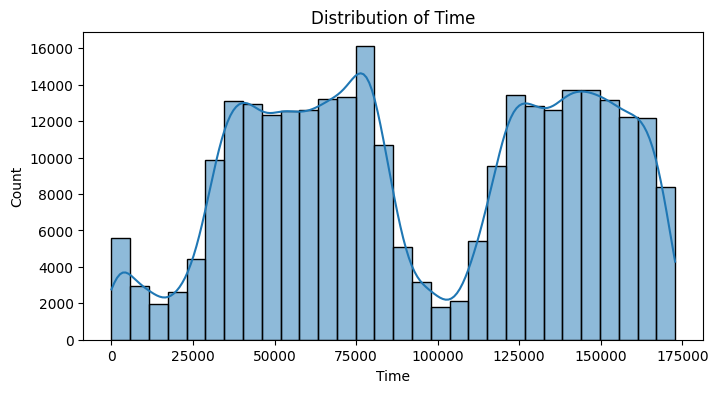

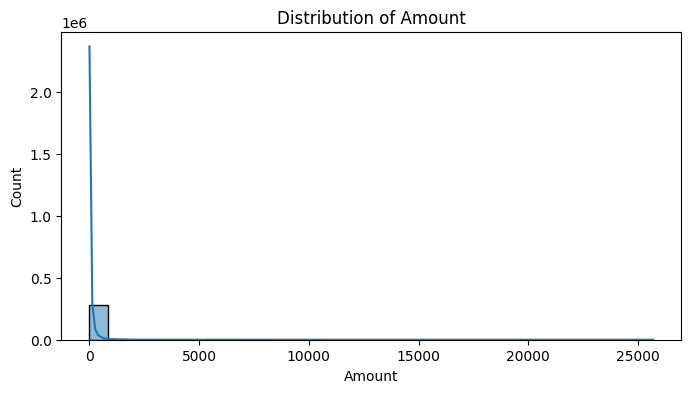

In [9]:
#Distribution for Time
num_cols=["Time","Amount"]
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

<Axes: xlabel='Amount_log', ylabel='Count'>

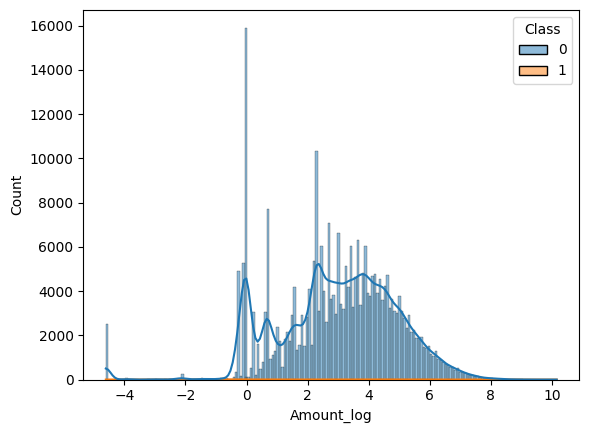

In [10]:
sns.histplot(data=df_cleaned, x="Amount_log", hue="Class", log_scale=False, kde=True)

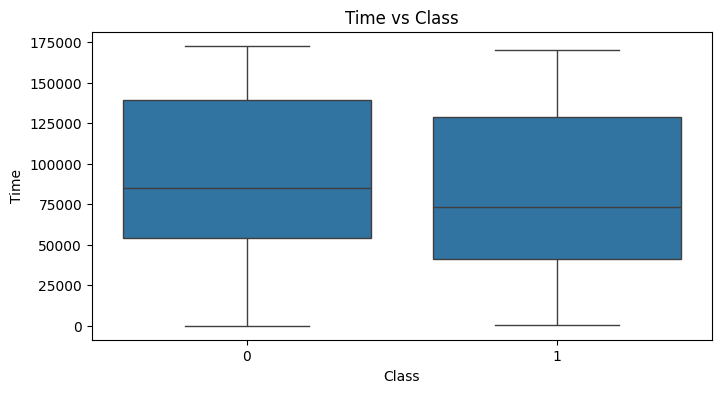

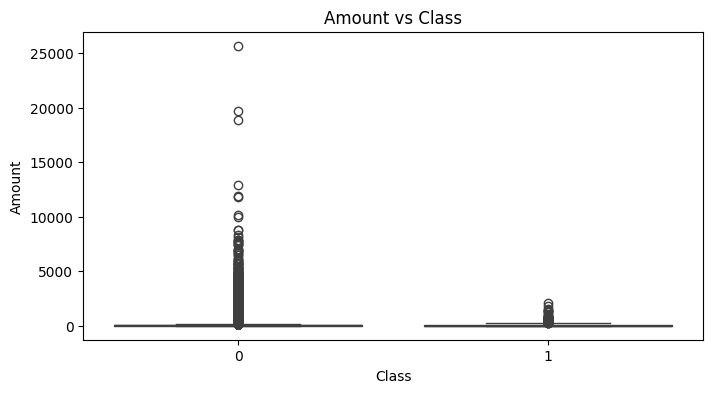

In [11]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x="Class", y=col, data=df_cleaned)
    plt.title(f"{col} vs Class")
    plt.show()

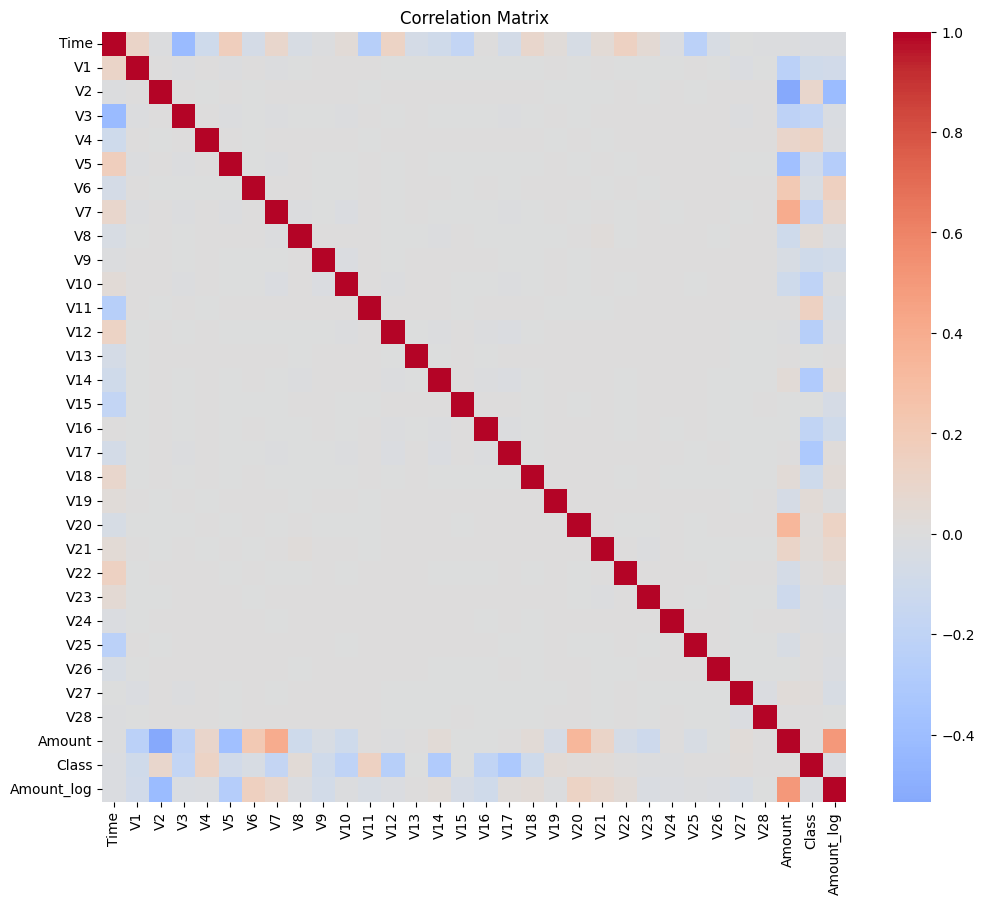

Class         1.000000
V11           0.149067
V4            0.129326
V2            0.084624
V19           0.033631
V8            0.033068
V21           0.026357
V27           0.021892
V20           0.021486
V28           0.009682
Amount        0.005777
V22           0.004887
V26           0.004265
V25           0.003202
V15          -0.003300
V13          -0.003897
V23          -0.006333
V24          -0.007210
Time         -0.012359
Amount_log   -0.014156
V6           -0.043915
V5           -0.087812
V9           -0.094021
V1           -0.094486
V18          -0.105340
V7           -0.172347
V3           -0.182322
V16          -0.187186
V10          -0.206971
V12          -0.250711
V14          -0.293375
V17          -0.313498
Name: Class, dtype: float64


In [12]:
plt.figure(figsize=(12,10))
corr = df_cleaned.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Correlation with Churn
corr_class = corr['Class'].sort_values(ascending=False)
print(corr_class)

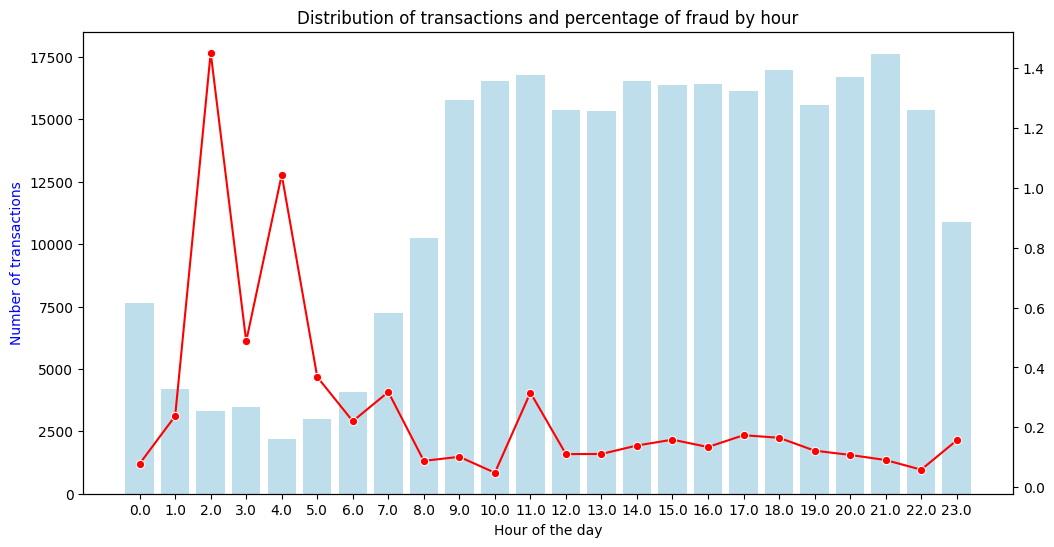

In [13]:
#Create new column with hour of transaction
df_cleaned["Hour"] = (df_cleaned["Time"] // 3600) % 24

fraud_by_hour = df_cleaned.groupby("Hour")["Class"].mean() * 100
transactions_by_hour = df_cleaned.groupby("Hour")["Class"].count()

#Create graphic
fig, ax1 = plt.subplots(figsize=(12,6))

sns.barplot(x=fraud_by_hour.index, y= transactions_by_hour.values, color="skyblue", ax= ax1, alpha=0.6)
ax1.set_ylabel("Number of transactions", color="blue")
ax1.set_xlabel("Hour of the day")

#Percentage of fraud
ax2 = ax1.twinx()
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, color="red", marker="o", ax=ax2)


plt.title("Distribution of transactions and percentage of fraud by hour")
plt.show()

In [14]:
#Select the top correlated features with class

corr = df_cleaned.corr()["Class"].abs().sort_values(ascending=False)
top_features = corr.index[1:6]

print("Top correlated features with Class: ")
print(top_features)

Top correlated features with Class: 
Index(['V17', 'V14', 'V12', 'V10', 'V16'], dtype='object')


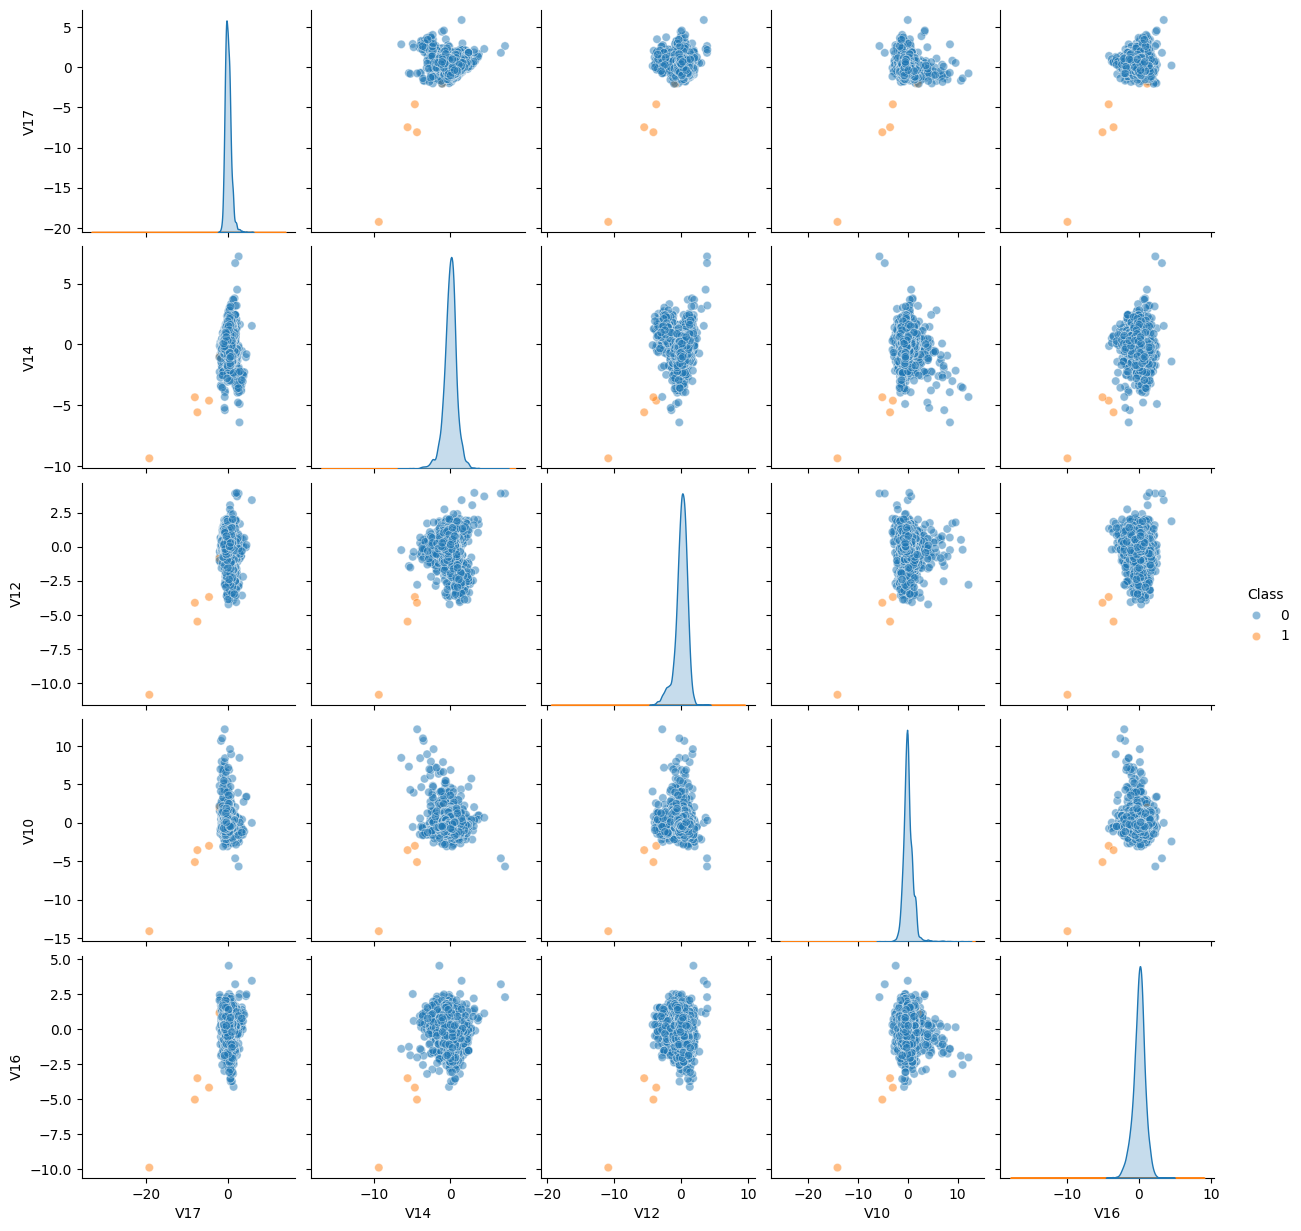

In [15]:
cols = ['V17', 'V14', 'V12', 'V10', 'V16', 'Class']

# Sample of 5000
sampled_df = df[cols].sample(n=5000, random_state=42)

# Pairplot
sns.pairplot(sampled_df, hue="Class", diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()

In [16]:
df_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008099,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.989541,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936639,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816241,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248352,0.0


In [17]:
df_modeling = df_cleaned.drop(columns =[ "Amount", "Time"])
df_modeling.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_log,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008099,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.989541,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936639,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816241,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248352,0.0


In [18]:
#Select the features and target
X = df_modeling.drop("Class", axis=1)
y = df_modeling["Class"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [20]:
def evaluate_model(name, X_test, y_test, y_pred_variable, y_proba_variable):

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_variable)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap= "Blues", cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Prediction")
    plt.ylabel("Real Value")
    plt.show()

#Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_variable, digits=4))

#ROC_AUC_SCORE

    roc_auc = roc_auc_score(y_test, y_proba_variable)
    print("\nROC-AUC:", roc_auc)

 # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_proba_variable)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, color='green')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve - {name}')
    plt.grid()
    plt.show

In [26]:
df.shape

(284807, 31)

In [22]:
rf_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=42)),
    ("model",RandomForestClassifier(n_jobs= -1, random_state=42)) 
])

In [23]:
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [24]:
y_pred_rf = rf_pipeline.predict(X_test)
y_proba_rf = rf_pipeline.predict_proba(X_test)[:,1]

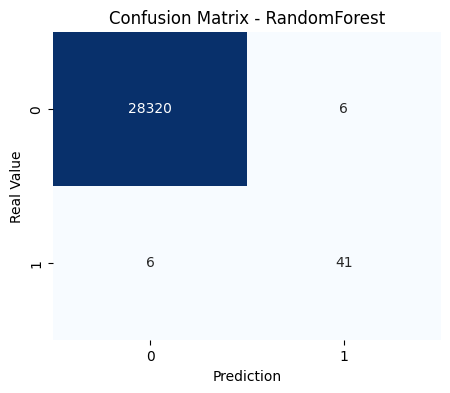


Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9998    0.9998     28326
           1     0.8723    0.8723    0.8723        47

    accuracy                         0.9996     28373
   macro avg     0.9361    0.9361    0.9361     28373
weighted avg     0.9996    0.9996    0.9996     28373


ROC-AUC: 0.9749376935106608


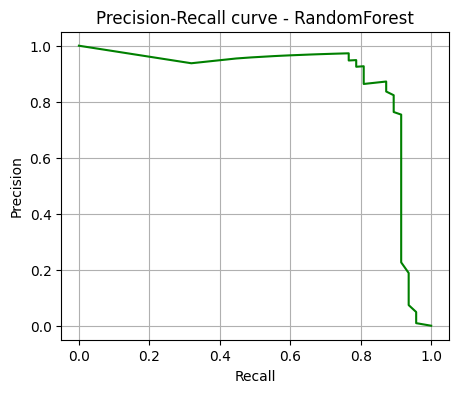

In [25]:
evaluate_model("RandomForest", X_test, y_test, y_pred_rf, y_proba_rf)